In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import numpy as np
import tensorflow as tf
#installed necessary libraries and imported them

In [3]:
df = pd.read_csv(r'NSE-RELIANCE.csv')

In [4]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,0,01-01-2015,438.988831,441.812073,437.676270,439.781311,417.988892,1367720,181432,9740,-0.0036
1,1,02-01-2015,439.880371,443.818054,437.998199,438.617340,416.882599,3383424,260835,19270,-0.0026
2,2,05-01-2015,438.344940,441.267212,432.946106,433.812897,412.316284,4662967,328788,39864,-0.0110
3,3,06-01-2015,430.915344,432.401276,412.093750,414.124512,393.603546,8596809,975422,26226,-0.0454
4,4,07-01-2015,414.619812,425.367950,414.570282,423.139069,402.171295,9562421,660342,24450,0.0218


In [5]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
1988,1989,24-01-2023,2440.000000,2443.649902,2387.350098,2415.949951,2415.949951,7609558,349349,15122,-0.0059
1989,1990,25-01-2023,2412.449951,2414.699951,2380.000000,2382.550049,2382.550049,5715684,103914,14987,-0.0138
1990,1991,27-01-2023,2384.399902,2387.350098,2311.649902,2337.350098,2337.350098,11920991,452582,59632,-0.0190
1991,1992,30-01-2023,2331.699951,2371.899902,2301.000000,2359.750000,2359.750000,10047822,1392194,29192,0.0096
1992,1993,31-01-2023,2382.000000,2387.650000,2341.000000,2353.850000,2353.850000,10470859,100296,10412,-0.0025


C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


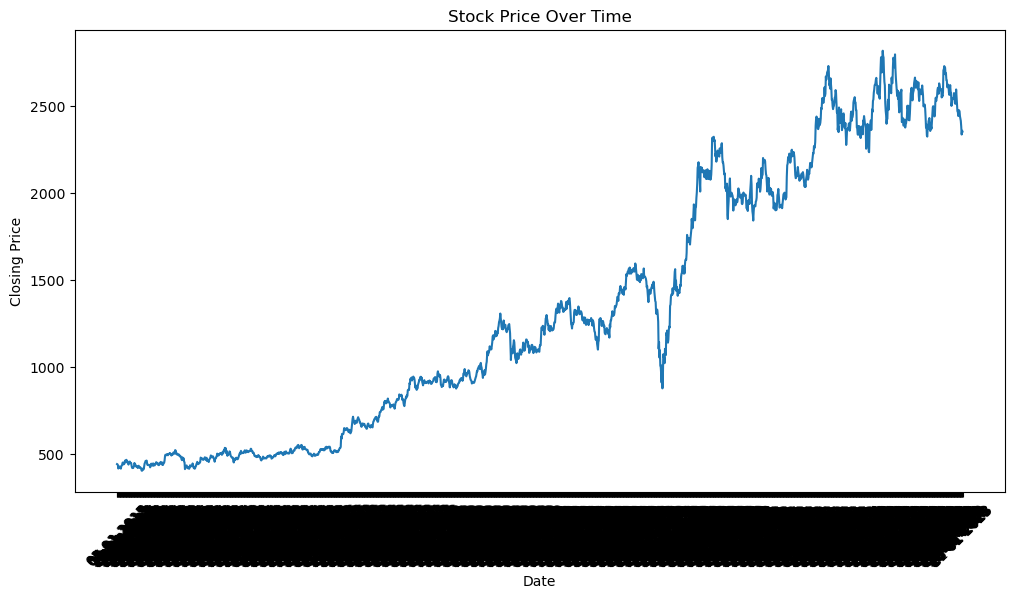

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)   #to avoid overlapping and improve readability if the date labels are long.
plt.show()

C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


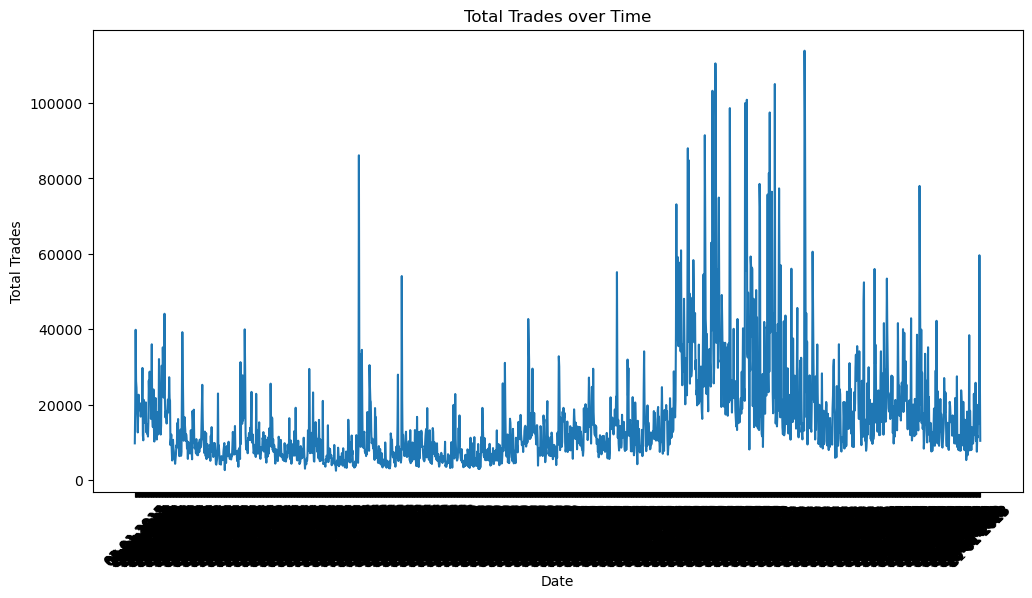

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='No. of Trades')
plt.title('Total Trades over Time')
plt.xlabel('Date')
plt.ylabel('Total Trades')
plt.xticks(rotation=45)
plt.show()

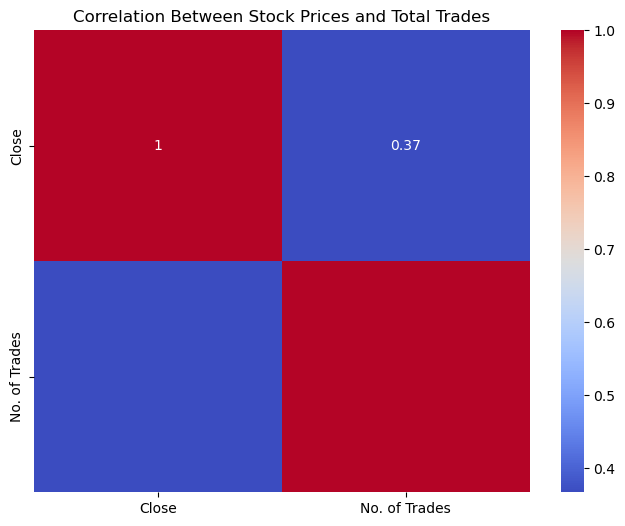

In [8]:
# Assuming 'Close' and 'Total Trades' are columns in the DataFrame df
correlation_matrix = df[['Close', 'No. of Trades']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and Total Trades')
plt.show()

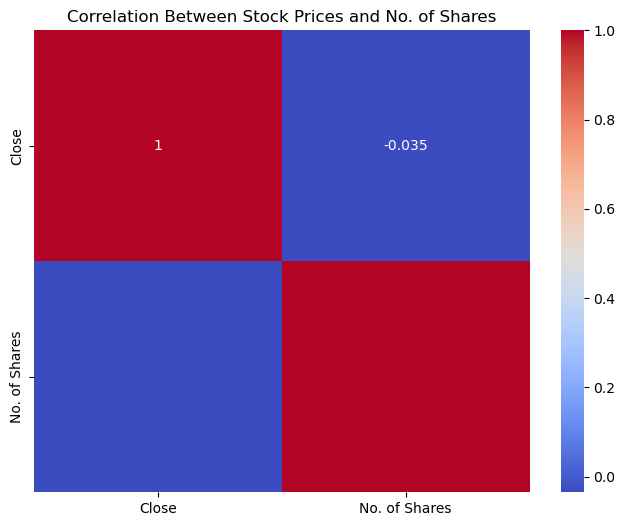

In [9]:
correlation_matrix = df[['Close', 'No. of Shares']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and No. of Shares')
plt.show()

In [10]:
df1=df.reset_index()['Close']

In [11]:
df1

0        439.781311
1        438.617340
2        433.812897
3        414.124512
4        423.139069
           ...     
1988    2415.949951
1989    2382.550049
1990    2337.350098
1991    2359.750000
1992    2353.850000
Name: Close, Length: 1993, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.01580162],
       [0.0153203 ],
       [0.01333358],
       ...,
       [0.80047815],
       [0.80974089],
       [0.80730114]])

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1295, 698)

In [16]:
#Data preprocessing
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)
#(Number of records,time_step)

(1219, 75)
(1219,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(622, 75)
(622,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(75, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')


model.summary()

C:\Users\aman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 75, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 75, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0170 - val_loss: 0.0026
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 7.3593e-04 - val_loss: 0.0133
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 7.3375e-04 - val_loss: 0.0045
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 5.6188e-04 - val_loss: 0.0104
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 6.3393e-04 - val_loss: 0.0046
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 5.5296e-04 - val_loss: 0.0095
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 5.3393e-04 - val_loss: 0.0075
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 4.4686e-04 - val_loss: 0.0083
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 4.1852e-04 - val_loss: 0.0103
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 4.2383e-04 - val_loss: 0.0095
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 3.5855e-04 - val_loss: 0.0092
Epoch 12/50
20/20 

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012288807256315174

In [25]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.03285349791549632

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

look_back=75
# Create arrays to plot baseline, training predictions, and test predictions
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot the baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Actual Data')  # Plot the actual data
plt.plot(trainPredictPlot, label='Training Predictions')     # Plot the training predictions
plt.plot(testPredictPlot, label='Test Predictions')          # Plot the test predictions

# Label the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Baseline and Predictions')
plt.legend()  # Show legend with the labels specified above
plt.show()


In [ ]:
len(test_data)

In [ ]:
x_input=test_data[345:].reshape(1,-1)#Predicting with the help of previous 100 days
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

In [ ]:
from numpy import array

lst_output = []
n_steps = 352
i = 0
while i < 10:
    
    if len(temp_input) > 352:
        # print(temp_input)
        x_input = np.array(temp_input[1:])  # Exclude the first element
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to match the model input shape
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,161)
import matplotlib.pyplot as plt
len(df1)

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.plot(day_new, scaler.inverse_transform(df1[1843:]), label='Actual Data')

# Plotting the predicted data
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Data')

plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Convert df1 to a list and extend it with lst_output
df3 = df1.tolist()
df3.extend(lst_output)

# Plot the combined data
plt.plot(df3[1100:], label='Combined Data')

# Label the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Combined Data Plot')
plt.legend()  
plt.show()
